<h3 align="right">mCP, &nbsp; dSPN, &nbsp; 160118_c7_D1, &nbsp; animal_1_n30_04102017_cel1 </h3>

# Model selection

## Model data

In [24]:
import cell_model, cell_evaluator
morphofile = 'morphology/animal_1_n30_04102017_cel1.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_546.soma.v': 'expdata/ECall_IV_ch3_546.dat',
    'IV_556.soma.v': 'expdata/ECall_IV_ch3_556.dat',    
    'IDthresh-sub_586.soma.v': 'expdata/ECall_IDthresh_ch3_586.dat',    
    'IDthresh_587.soma.v': 'expdata/ECall_IDthresh_ch3_587.dat',    
    'IDthresh_588.soma.v': 'expdata/ECall_IDthresh_ch3_588.dat',    
    'IDthresh_598.soma.v': 'expdata/ECall_IDthresh_ch3_598.dat',    
}

## Simulation environment

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [26]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [27]:
from utils import *

In [28]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [29]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [30]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/animal_1_n30_04102017_cel1.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.ba

In [31]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

g_pas.axonal
g_pas.basal
g_pas.somatic
gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [32]:
simulator = ephys.simulators.NrnSimulator()

In [33]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [34]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


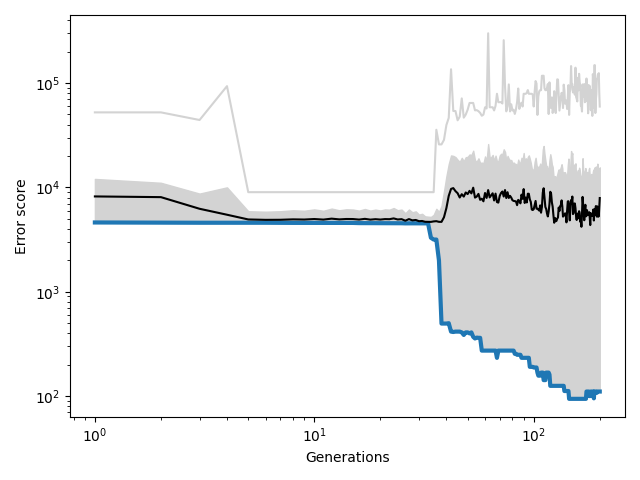

In [35]:
plot_log(log)

In [36]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
g_pas.axonal,0.006866,0.006212,0.004657,0.00469,0.004516,0.002366,0.00299,0.004516,0.006866,0.007217
g_pas.somatic,0.002385,0.002385,0.002534,0.002383,0.002386,0.001565,0.002362,0.002385,0.002385,0.002385
g_pas.basal,3.272e-05,1.081e-05,1.01e-05,1.031e-05,3.272e-05,0.0001588,2.518e-05,3.272e-05,1.01e-05,1.01e-05
gbar_naf.axonal,1.899,2.606,2.003,2.666,1.91,2.142,0.09333,1.91,1.899,3.452
gbar_kas.axonal,0.1214,0.1214,0.1214,0.1214,0.1214,0.121,0.03942,0.1214,0.1214,0.1214
gbar_Im.axonal,0.09695,0.07704,0.07704,0.07704,0.09695,0.09511,0.1095,0.09695,0.1002,0.0829
gbar_naf.somatic,9.748,9,9.748,9.748,9.176,9.696,9.773,9.748,9.748,9.65
gbar_kaf.somatic,0.1789,0.1022,0.1789,0.2179,0.1789,0.2609,0.1213,0.1789,0.1818,0.135
gbar_kas.somatic,0.0006833,0.0006903,0.000413,0.000119,8.88e-06,0.0002928,0.0005385,0.0001384,0.0006833,0.0002387
gbar_kdr.somatic,0.001472,0.001043,0.001425,0.001425,0.001242,0.001462,0.001113,0.001242,0.001454,0.001643


<IPython.core.display.Javascript object>


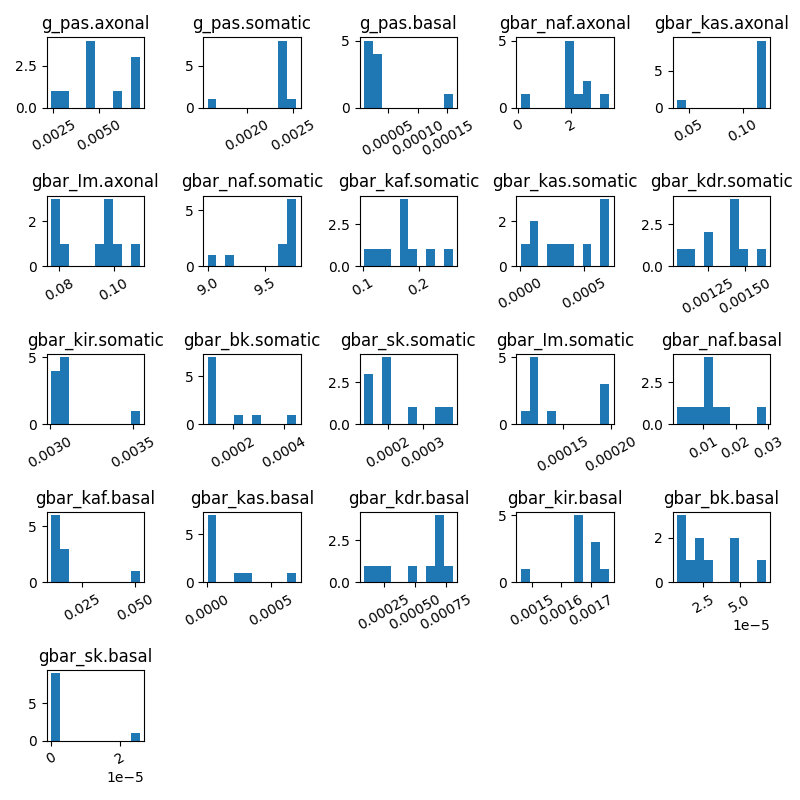

In [37]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


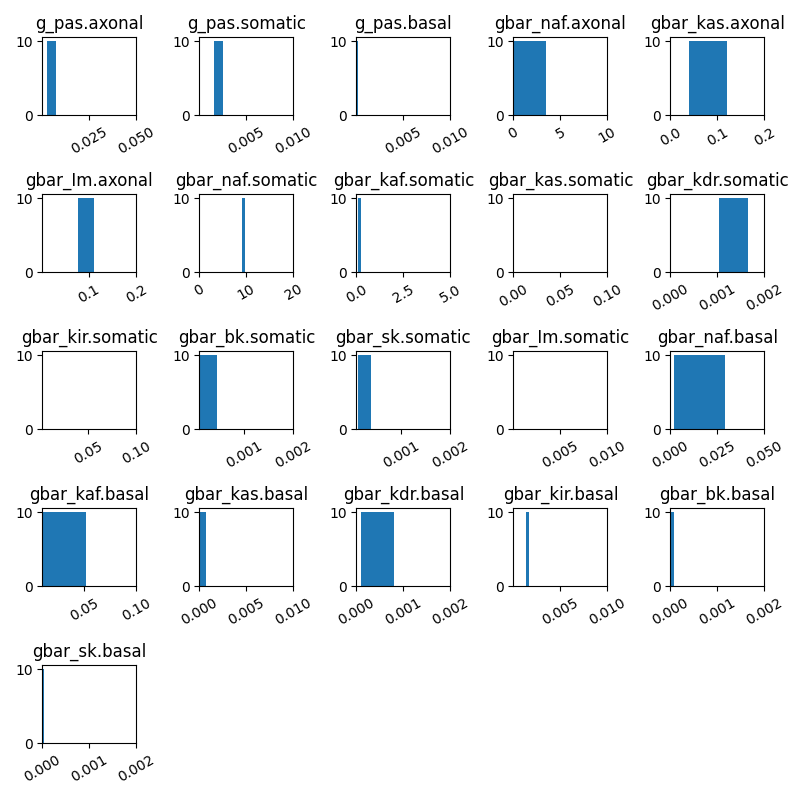

In [38]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [39]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


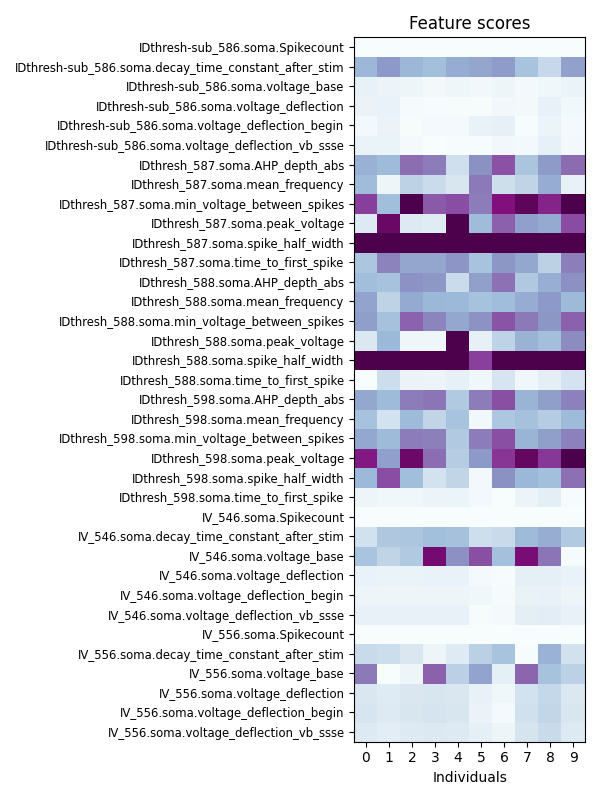

In [40]:
if evaluate_all:
    plot_scores(df, figsize=(6, 8), vmin=0, vmax=10)

## Single-cell simulation

In [41]:
ind = 0
test_parameters = best_models[ind]

In [42]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


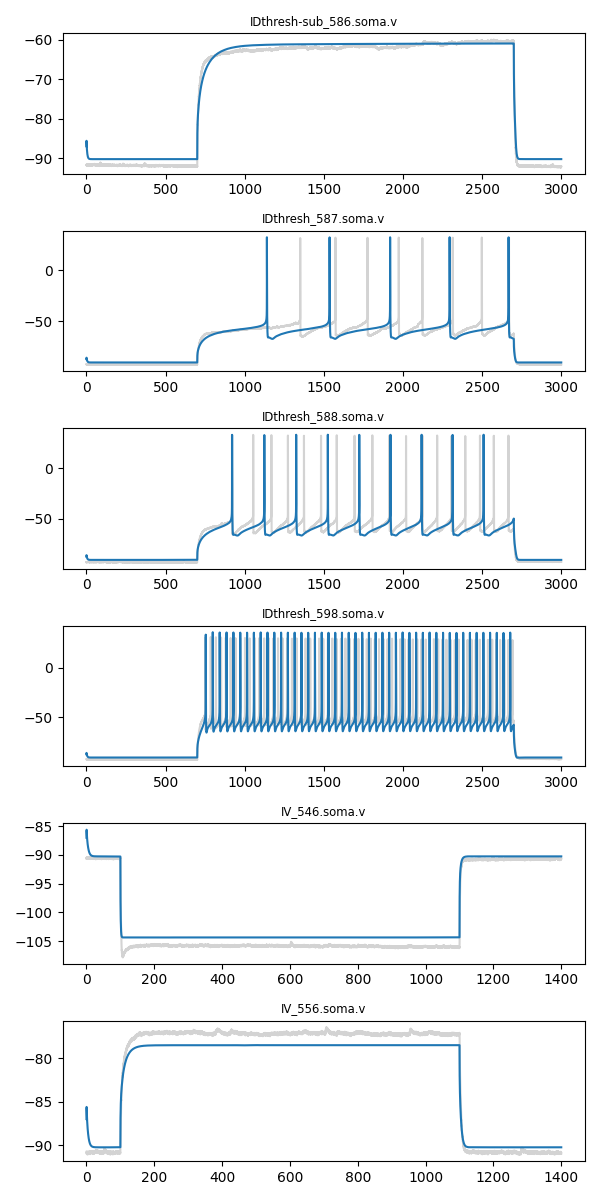

In [43]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


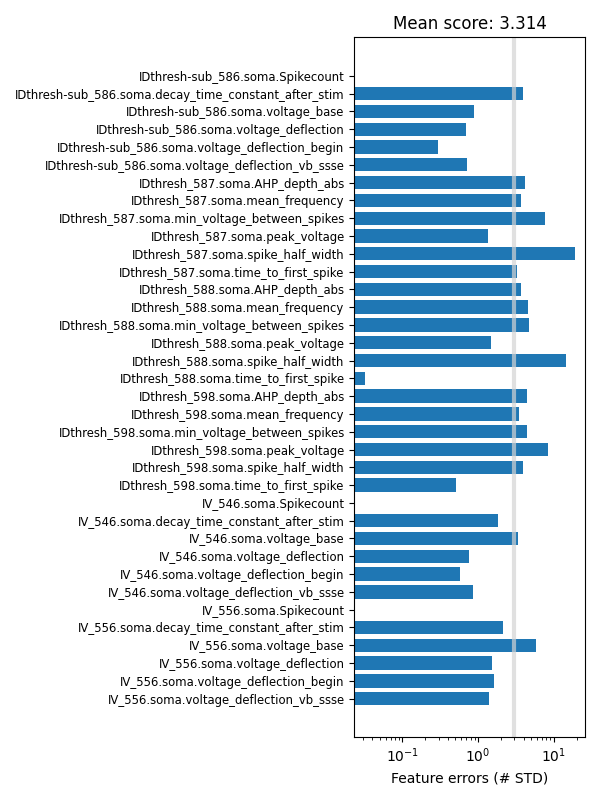

In [44]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,8))

In [45]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.400000,1.170000,1.450000,1.220000,1.630000,2.000000,1.140000,1.030000,1.390000
1,1.400000,0.000000,1.340000,1.230000,1.770000,1.300000,2.250000,1.770000,1.160000,1.400000
2,1.170000,1.340000,0.000000,1.010000,1.720000,1.610000,2.000000,1.450000,0.720000,0.700000
3,1.450000,1.230000,1.010000,0.000000,1.720000,1.410000,2.170000,1.510000,1.280000,1.160000
4,1.220000,1.770000,1.720000,1.720000,0.000000,1.840000,2.290000,1.370000,1.600000,1.800000
5,1.630000,1.300000,1.610000,1.410000,1.840000,0.000000,2.330000,1.850000,1.510000,1.740000
6,2.000000,2.250000,2.000000,2.170000,2.290000,2.330000,0.000000,2.060000,2.090000,2.160000
7,1.140000,1.770000,1.450000,1.510000,1.370000,1.850000,2.060000,0.000000,1.540000,1.370000
8,1.030000,1.160000,0.720000,1.280000,1.600000,1.510000,2.090000,1.540000,0.000000,1.010000
9,1.390000,1.400000,0.700000,1.160000,1.800000,1.740000,2.160000,1.370000,1.010000,0.000000


In [46]:
hall_of_fame = []
selected = range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)